In [112]:
# Suppressing warnings to avoid unnecessary output
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries

# pandas: For data manipulation and analysis
import pandas as pd

# numpy: For numerical computations
import numpy as np

# tensorflow: Deep learning library for building and training models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2  # L2 regularization for weight decay
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping to prevent overfitting

In [113]:
# Loading the dataset from a CSV file
data = pd.read_csv('emails.csv')  # Reading the CSV file into a pandas DataFrame

# Displaying the first 5 rows of the dataset to understand its structure
data.head()  # Returns the first 5 rows of the DataFrame


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [114]:
# Displaying summary information about the dataset
data.info()  # Provides a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [115]:
# Dropping the 'Email No.' column from the DataFrame
data.drop(['Email No.'], axis=1, inplace=True)

In [116]:
# Splitting the data into features (X) and target variable (y)

# X contains all columns except 'Prediction', which are used as features for training the model
X = data.drop(['Prediction'], axis=1)

# y contains the 'Prediction' column or Target variable, which is the target variable (what we are trying to predict)
y = data['Prediction']

In [117]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the features (X) to have mean=0 and variance=1
X = scaler.fit_transform(X)

In [118]:
# Reshaping the features (X) to 3D array for use in 1D convolutional neural networks (CNNs)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [119]:
# Print the shape of the reshaped features (X)
print(X.shape)

(5172, 3000, 1)


In [120]:
# Importing train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (30% test size, 70% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (3620, 3000, 1)
Testing data shape: (1552, 3000, 1)


In [121]:
# Importing necessary layers and optimizer for the model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build the Conv1D Model using a Sequential model
model = Sequential()

# 1st Conv1D layer with L2 regularization
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',
                 kernel_regularizer=l2(1e-4), input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())  # Normalizes the activations of the previous layer
model.add(Dropout(0.4))  # Dropout with 40% chance to prevent overfitting

# Flatten the output from Conv1D and add a Dense layer
model.add(Flatten())  # Flattens the 3D tensor to 1D
model.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-4)))  # Fully connected layer with L2 regularization
model.add(Dropout(0.6))  # Dropout with 60% chance to prevent overfitting

# Output layer with sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss function
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
# Importing EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),  # Use validation data for evaluation
                    epochs=50,  # Number of epochs to train the model
                    batch_size=32,  # Number of samples per gradient update
                    callbacks=[early_stopping])  # Using early stopping during training

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7918 - loss: 1.4502 - val_accuracy: 0.9349 - val_loss: 0.4850
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9124 - loss: 0.3669 - val_accuracy: 0.9626 - val_loss: 0.2776
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9398 - loss: 0.1772 - val_accuracy: 0.9639 - val_loss: 0.3888
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9499 - loss: 0.3163 - val_accuracy: 0.9716 - val_loss: 0.3098
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9535 - loss: 0.2422 - val_accuracy: 0.9807 - val_loss: 0.2758
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9615 - loss: 0.2287 - val_accuracy: 0.9729 - val_loss: 0.3221
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9613 - loss: 0.1529 - val_accuracy: 0.9684 - val_loss: 0.2582
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9591 - loss: 0.1567 - val_accuracy: 0

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.2063
Test Loss: 0.19418726861476898
Test Accuracy: 0.9813144207000732


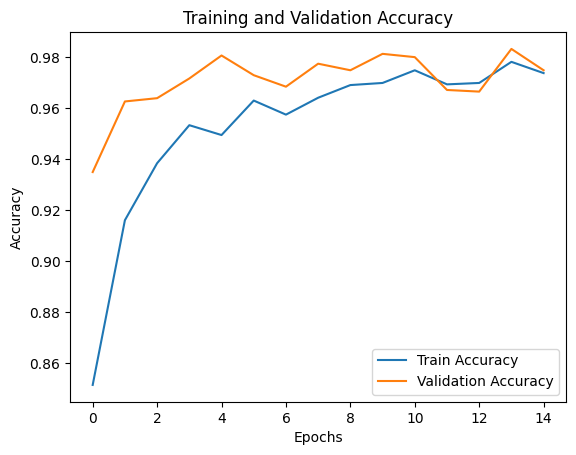

In [123]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)  # Prints the loss on the test data
print("Test Accuracy:", test_accuracy)  # Prints the accuracy on the test data

# Importing matplotlib for plotting the training history
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy over epochs
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Display legend to differentiate the lines
plt.title('Training and Validation Accuracy')  # Title for the plot
plt.show()  # Display the plot